In [2]:
import ENDFtk
import numpy as np
import matplotlib.pyplot as plt

import importlib
import Samplor
importlib.reload(Samplor)
from Samplor import NuclearDataSampler


# Load the tape and external files
tapepath = '/home/sole-pie01/work/ndlib/jeff33-neutron/26-Fe-56g.jeff33'

# Create the sampler
# sampler = NDS.NuclearDataSampler(tapepath)

# # Generate samples
# sampler.sample_parameters(n_samples=100)

# # Write the sampled tapes
# sampler.write_samples()


In [14]:
tape = ENDFtk.tree.Tape.from_file(tapepath)
# List all the MAT in the current file : tape.material_numbers[:], generally there's only one
mf33 = tape.MAT(tape.material_numbers[0]).MF(33).parse()
mf33mt1 = tape.MAT(tape.material_numbers[0]).MF(33).MT(1).parse()

print(tape.material_numbers[0])
# One section of MF33 correspond to 1 reaction XS (rows of matrix) 
for section in mf33.MTs.to_list():
    # Each subsection is another (or same) correlated reaction (cols of matrix)
    for sub in section.reactions.to_list():
        print(section.MT, sub.MAT1, sub.MT1)
        # Each subsection are composed of subsubsections containing matrix components (like the diagonal or a term to add to specific energies)
        # All subsub must be added to reconstruct the final explicit matrix 
        for explicit in sub.explicit_covariances.to_list():
            print(explicit.LB) # LB is a flag telling us what type is the component, diagonal, energy part, etc... 
            
        # The covariance matrices involving the “derived” cross sections may be obtained
        # in part in terms of the covariance matrices of the "explicit" cross sections given elsewhere
        for composed in sub.explicit_covariances.to_list():
            print(explicit.LTY) # LTY is a flag to interpret the matrix
        
        
    

2631
   1
   5
   8
   5
    6
   5
   5
   8
    6
     6
      6
       6
        6
         6
          6
           6
            6
   5
   8
    6
     6
      6
       6
        6
         6
          6
           6
            6
   5
   8
    6
     6
      6
       6
        6
         6
          6
           6
            6
   5
   5
   8
    6
     6
      6
       6
        6
         6
          6
           6
            6
   5
   8
    6
     6
      6
       6
        6
         6
          6
           6
            6
   5
   8
    6
     6
      6
       6
        6
         6
          6
           6
            6
   5
   8
    6
     6
      6
       6
        6
         6
          6
           6
            6
   5
   8
    6
     6
      6
       6
        6
         6
          6
           6
            6


0
[8, 5]


AttributeError: can't set attribute

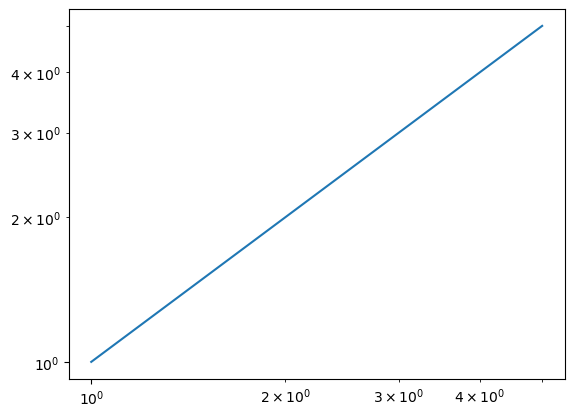

In [21]:
import NOTEBOOKS.endftk.NuclearDataSampler.Interpolator as Interpolator
importlib.reload(Interpolator)
from NOTEBOOKS.endftk.NuclearDataSampler.Interpolator import XSInterpolator 

from ENDFtk.MF3 import Section

chunk = Section( mt = 102,  zaid = 1001, lr = 0, awr = 0.9991673,
                    qm = 2.224648e+6, qi = 3.224648e+6,
                    interpolants = [ 2], boundaries = [ 6],
                    energies = [ 1e-5, 2e-5, 7.5e+5,
                                1.9e+7, 1.95e+7, 2e+7 ],
                    xs = [ 1.672869e+1, 1.182897e+1, 3.347392e-5,
                        2.751761e-5, 2.731301e-5, 2.710792e-5 ] )
# print(chunk.to_string(125, 3))
# for i, boundary in enumerate(chunk.boundaries[:]):
#     print(boundary)

chonk = Section( mt = 102,  zaid = 1001, lr = 0, awr = 0.9991673,
                 qm = 2.224648e+6, qi = 3.224648e+6,
                 interpolants = [5], boundaries = [ 2 ],
                 energies = [ 1, 5 ],
                 xs = [ 1, 5 ] )

plt.loglog(chonk.energies[:], chonk.cross_sections[:], label=f"H1 - MT{chonk.MT}")  # Use the file name as the label
# Add a new range to create a small "hump" in the plot
interpolator = XSInterpolator(chunk)
interpolator.AddRange(interp=2, energies=[3, 3.5, 4], xs=[8, 2, 9])
interpolator.save_to_section()

plt.loglog(chonk.energies, chonk.cross_sections, marker='o', label=f"H1 - MT{chonk.MT}")

# Finalize the plot
plt.xlabel('Energy (eV)')
plt.ylabel('Cross section (b)')
plt.legend()
plt.grid(True) 
plt.show()

[1.0, 2.0, 3.0, 3, 3.5, 4, 4.0, 5.0, 6.0]
[5]
[3, 6, 8]
[5]
[5, 2, 5]


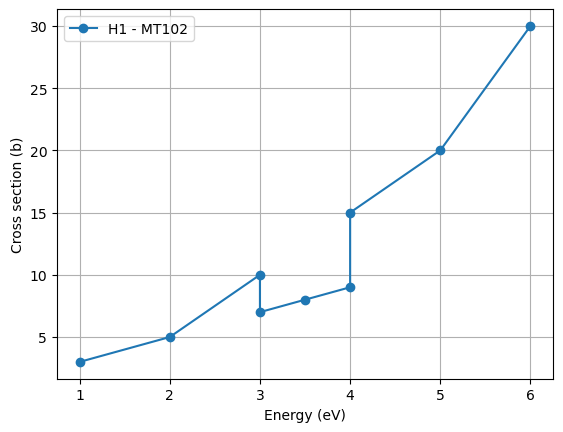

In [73]:
import NOTEBOOKS.endftk.NuclearDataSampler.Interpolator as Interpolator
importlib.reload(Interpolator)
from NOTEBOOKS.endftk.NuclearDataSampler.Interpolator import XSInterpolator 

# Initialize the original Section
original_section = Section(
    mt=102, zaid=1001, lr=0, awr=0.9991673,
    qm=2.224648e+6, qi=3.224648e+6,
    interpolants=[5], boundaries=[6],
    energies=[1, 2, 3, 4, 5, 6],
    xs=[3, 5, 10, 15, 20, 30]
)

# Instantiate XSInterpolator with the original section
interpolator = XSInterpolator(original_section)

# Add a new range to create a small "hump" in the plot
interpolator.AddRange(interp=2, energies_new=[3, 3.5, 4], xs_new=[7, 8, 9])

# Create a new Section with the modified data
new_section = interpolator.create_new_section()

# Plot the modified section
plt.plot(new_section.energies, new_section.cross_sections, marker='o', label=f"H1 - MT{new_section.MT}")

# Finalize the plot
plt.xlabel('Energy (eV)')
plt.ylabel('Cross section (b)')
plt.legend()
plt.grid(True)
plt.show()


In [74]:
print(new_section.to_string(125, 3))

 1.001000+3 9.991673-1          0          0          0          0 125 3102     
 2.224648+6 3.224648+6          0          0          3          9 125 3102     
          4          5          7          2          9          5 125 3102     
 1.000000+0 3.000000+0 2.000000+0 5.000000+0 3.000000+0 1.000000+1 125 3102     
 3.000000+0 7.000000+0 3.500000+0 8.000000+0 4.000000+0 9.000000+0 125 3102     
 4.000000+0 1.500000+1 5.000000+0 2.000000+1 6.000000+0 3.000000+1 125 3102     
                                                                   125 3  0     



In [76]:
interpolator.GetLinearizedDataInRange(1, 2)

([1.0, 1.125, 1.25, 1.5, 1.75, 2.0],
 [2.9999999999999996,
  3.272042257442243,
  3.536230780226193,
  4.044775801847516,
  4.531395141469561,
  4.999999999999999])

In [38]:
interpolator = XSInterpolator(chunk)
print(interpolator.InterpolateAtEnergy(2.5))  # Outputs interpolated [f value, e]

[11.828930570527017, 2.5]
